In [1]:
from yellowbrick.classifier import ROCAUC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.metrics import classification_report
from yellowbrick.model_selection import LearningCurve
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
#from scikitplot.estimators import plot_learning_curve
#import scikitplot as skplt
import pandas as pd


In [2]:
df = pd.read_csv("data/clean.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/clean.csv'

In [ ]:


X = df.drop(["Loan_Status" ], axis=1)
# X is the dataframe without the target 

y = df.Loan_Status
#y is the target 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#we are splitting the dataset with train test split a test size of 30 percent of test and 70 percent of train 


In [ ]:
classifier_names = ["Logistic Regression"]
#This is the name of the model you are going to be using 
classifiers = [LogisticRegression()]
#This are the models you will be using 
zipped_clf = zip(classifier_names,classifiers)
#you will use this in the others function

In [ ]:

def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        #this will standardize you data you could change the StandardScaler with MinMaxScaler or normalizer
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
        #this will print the name in the final visualisation
    return result

In [ ]:

def fit_classifier(pipeline, X_train, y_train, x_test, y_test):
    
    model_fit = pipeline.fit(X_train, y_train)
    #fitting the model with the train_test_split from earlier
    y_pred = model_fit.predict(X_test)
    # we are predicting the result we could get with the test 
    accuracy = accuracy_score(y_test, y_pred)
    #you will see the accuracy of the prediction 
    print("accuracy train : %.3f"%model_fit.score(X_train , y_train))
    print("accuracy test : %.3f"%model_fit.score(X_test , y_test))
    print(classification_report(y_test, y_pred))
    #this will show the different metrix we are using for this model 
   
    
    learn = LearningCurve(model_fit)
    learn.fit(X_train , y_train)
    learn.score(X_test , y_test)
    learn.show()
    #for the learning curve you need to have the curve from the up about at the model of the model and same for the bottom one 
    #the first line will show how the train dataset is doing compared to test and the second line compared the test to the train
    #the space between the two line is the error possibility 
    
    visualizer = ROCAUC(model_fit , binary=True)
    visualizer.fit(X_train , y_train)
    visualizer.score(X_test , y_test)
    visualizer.show()
    #the roc curvers it needs to get up the as fast as possible this prooves your model train really easily but don't go to high overwise 
    #this means overfitting if your line is strainght or not rounded this is bad as hell 
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test') 
    plt.show()
    
    return accuracy
    #return learning
with open('deploying/model_pkl', 'wb') as files:
    pickle.dump(fit_classifier, files)

Validation result for Logistic Regression
LogisticRegression()
accuracy train : 0.810
accuracy test : 0.799
              precision    recall  f1-score   support

           0       1.00      0.34      0.51        44
           1       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144



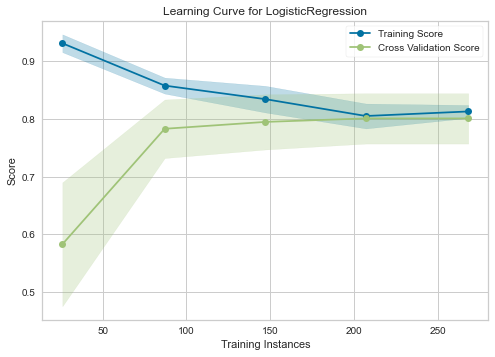

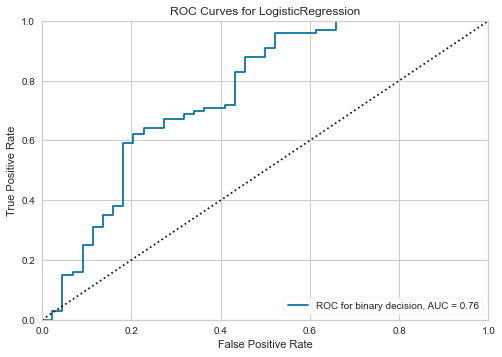

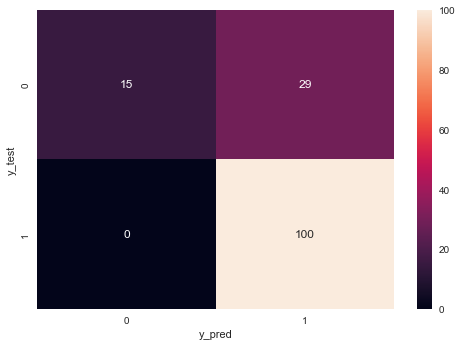

In [ ]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)